# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

**Exploratory Data Analysis (EDA)**

In [1]:
import json
import pandas as pd

# load the data
with open("task_1_train_data.json") as file:
  train_data = json.load(file)

df = pd.DataFrame(train_data)
print("Shape:\n", df.shape)
print(df.info())

Shape:
 (40000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   browser   40000 non-null  object
 1   os        40000 non-null  object
 2   locale    40000 non-null  object
 3   user_id   40000 non-null  int64 
 4   location  40000 non-null  object
 5   sites     40000 non-null  object
 6   time      40000 non-null  object
 7   date      40000 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.4+ MB
None


In [2]:
# print the head in more convenient way to analysze
df.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


In [3]:
print(f"The number of unique browsers: {df['browser'].nunique()}/{df.shape[0]}")
print(f"The number of unique os: {df['os'].nunique()}/{df.shape[0]}")
print(f"The number of unique locale: {df['locale'].nunique()}/{df.shape[0]}")
print(f"The number of unique user_id: {df['user_id'].nunique()}/{df.shape[0]}")
print(f"The number of unique locations: {df['location'].nunique()}/{df.shape[0]}")
print(f"The number of unique times: {df['time'].nunique()}/{df.shape[0]}")
print(f"The number of unique dates: {df['date'].nunique()}/{df.shape[0]}")

The number of unique browsers: 4/40000
The number of unique os: 6/40000
The number of unique locale: 25/40000
The number of unique user_id: 200/40000
The number of unique locations: 21/40000
The number of unique times: 1440/40000
The number of unique dates: 623/40000


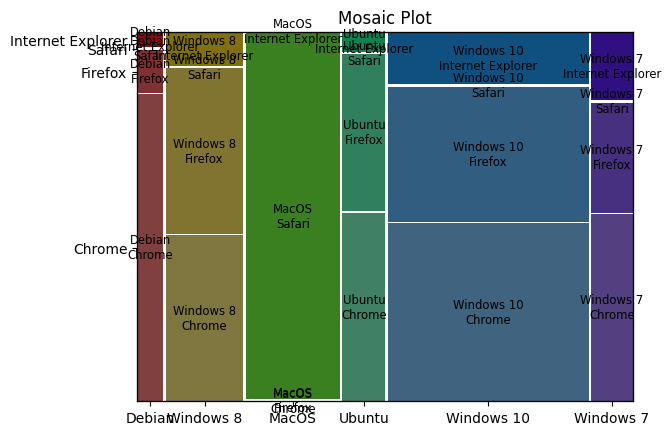

In [4]:
import statsmodels.graphics.mosaicplot as mplt
import matplotlib.pyplot as plt
mosaic = mplt.mosaic(df, ['os', 'browser'], title="Mosaic Plot")
plt.show()

In [5]:
df['user_id'].describe()

count    40000.000000
mean        99.500000
std         57.735027
min          0.000000
25%         49.750000
50%         99.500000
75%        149.250000
max        199.000000
Name: user_id, dtype: float64

As can be seen from the results above, the dataset has no missing features. Also, it has only 4 unique browsers and 6 unique os, which makes it very convenient to encode those categories.
Moreover, it seems innecessary to take into account the sites the the person visited and the day and time corresponding to it. Those features provide a great variaty which is not a good practice to rely on it a calssification problem. So, relying on those categories may even cause overfitting of a model. 'Sites' feature contains a list of visited sites an the time spent there, this column becoms difficult to analyze and rely on in a classification.
Furthermore, after dropping sites, day, and time, there will be nothing more to normalize as we will just encode categorical features.

**Data Preprocessing and Feature Engineering**

In [6]:
# drop unnecessary columns
df.drop(['sites', 'time', 'date'], axis=1, inplace=True)
df.head()

,browser,os,locale,user_id,location
0,Chrome,Debian,ur-PK,116,Russia/Moscow
1,Firefox,Windows 8,uk-UA,155,France/Paris
2,Safari,MacOS,fr-FR,39,Japan/Tokyo
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# encode categorical features
for col in ['browser', 'os', 'location', 'locale']:
  df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,browser,os,locale,user_id,location
0,0,0,20,116,13
1,1,5,19,155,5
2,3,1,9,39,9
3,0,5,12,175,0
4,1,2,16,50,20


In [8]:
# divide the data into features and labels
y = df['user_id']
x = df.drop('user_id', axis=1)
print(x.head())
print(y.head())

   browser  os  locale  location
0        0   0      20        13
1        1   5      19         5
2        3   1       9         9
3        0   5      12         0
4        1   2      16        20
0    116
1    155
2     39
3    175
4     50
Name: user_id, dtype: int64


In [9]:
# modify the labels to look like: 0 - Waldo, 1 - not Waldo
# so we can apply binary classification
for i in range(y.size):
  if y.iloc[i] != 0:
    y.iloc[i] = 1

In [10]:
from sklearn.model_selection import train_test_split

# split the data into train and test preserving the percentage of Waldos
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print(f'Percentage of Waldo in initial data: {1 - y.sum()/y.size}')
print(f'Percentage of Waldo in train data: {1 - y_train.sum()/y_train.size}')
print(f'Percentage of Waldo in test data: {1 - y_test.sum()/y_test.size}')

Percentage of Waldo in initial data: 0.0050000000000000044
Percentage of Waldo in train data: 0.0050000000000000044
Percentage of Waldo in test data: 0.0050000000000000044


During the preprocessing step I dropped 'sites', 'date', and 'time' columns, encoded categorical features 'browser', 'os', 'locale', and 'lovation' using Simple Encoder. Also, I splitted the data into train and test features and labels.

**Model Design and Training**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the layers for the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
# fit the model with the train data
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 0.0339 - accuracy: 0.9950 - val_loss: 0.0320 - val_accuracy: 0.9941
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0266 - accuracy: 0.9952 - val_loss: 0.0289 - val_accuracy: 0.9941
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0237 - accuracy: 0.9952 - val_loss: 0.0261 - val_accuracy: 0.9941
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0226 - accuracy: 0.9952 - val_loss: 0.0253 - val_accuracy: 0.9941
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0214 - accuracy: 0.9952 - val_loss: 0.0282 - val_accuracy: 0.9941
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0213 - accuracy: 0.9952 - val_loss: 0.0265 - val_accuracy: 0.9941
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0204 - accuracy: 0.9952 - val_loss: 0.0259 - val_accuracy: 0.9941
Epoch 

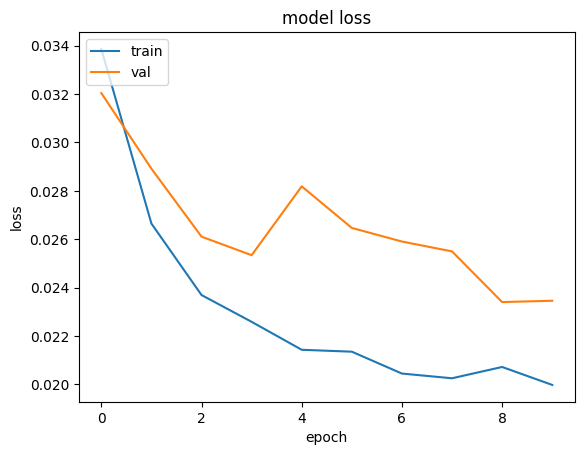

In [13]:
import matplotlib.pyplot as plt

# plot the change in model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

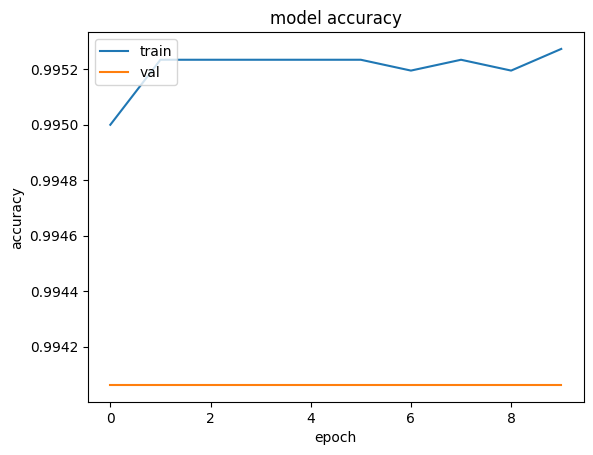

In [14]:
# plot the change in model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

All the hyperparameters in the ANN were detrmined experimentally. Different variations were placed to see when the model gives the best result.

**Feature Importance Analysis**

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# define a custom scorer function
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    y_pred = (y_pred > 0.96).astype(int)
    return accuracy_score(y, y_pred)

# perform permutation importance
perm_importance = permutation_importance(model, x_test, y_test, scoring=custom_scorer, n_repeats=10, random_state=42)

# get feature importance scores
importance_scores = perm_importance.importances_mean

# get feature names
feature_names = x_test.columns

# sort feature importance scores and feature names
sorted_indices = importance_scores.argsort()[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

for score, name in zip(sorted_importance_scores, sorted_feature_names):
    print(f"{name}: {score}")


250/250 [==============================] - 1s 2ms/step
os: 0.014200000000000046
browser: 0.01385000000000004
location: 0.0015000000000000568
locale: -0.007137499999999952


As can be seen from the result above, all the features have small influence on the model. However, 'browser' and 'os' affect the result more than others.

**Evaluation**

In [16]:
from sklearn.metrics import classification_report
import numpy as np

# print the metrics of the model
y_pred = model.predict(x_test)
# the treshold for the label to be Waldo also was set by experimenting with different values
y_pred = (y_pred > 0.96).astype(int)
print(y_pred.sum()/y_pred.size)
print(classification_report(y_test, y_pred, labels=[0, 1]))

250/250 [==============================] - 1s 2ms/step
0.972375
              precision    recall  f1-score   support

           0       0.10      0.55      0.17        40
           1       1.00      0.97      0.99      7960

    accuracy                           0.97      8000
   macro avg       0.55      0.76      0.58      8000
weighted avg       0.99      0.97      0.98      8000



The metric I used as the main guide in this task was recall as it higer recall ensures smaller number of false negative values. Because of significant imbalance in data it was necessary not to rely on the overall accuracy of a model so much, because even the model which always says "not Waldo' will give us 99.5% accuracy.

In [21]:
# evaluate the data on a hidden dataset
with open("task_1_verify.json") as file:
  verify_data = json.load(file)

# preprocess the data an d predict labels
verify_df = pd.DataFrame(verify_data)
verify = verify_df.drop(['time', 'date', 'sites'], axis=1, inplace=False)

for column in ['browser', 'os', 'locale', 'location']:
    verify[column] = LabelEncoder().fit_transform(verify[column])

y_verify_pred = model.predict(verify)
y_verify_pred = (y_verify_pred > 0.96).astype(int)

for i, prediction in enumerate(y_verify_pred):
    verify_data[i]['is_waldo'] = bool(1 - prediction)

# save the updated verification dataset
with open('task_1_is_waldo.json', 'w') as file:
    json.dump(verify_data, file)

1250/1250 [==============================] - 4s 3ms/step


In [22]:
# show the updated verification dataset
with open("task_1_is_waldo.json") as file:
  data = json.load(file)

data_df = pd.DataFrame(data)
data_df.head()

,browser,os,locale,location,sites,time,date,is_waldo
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05,False
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22,False
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30,False
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27,False
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19,False


In [23]:
# show the persentage of Waldos found in the hidden dataset
count_waldo = data_df['is_waldo'].astype(int).sum()
print(count_waldo/data_df.size)

0.003328125
